In [45]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

from read import read_data, read_passfail
import const

## Columns and types

In [16]:
data = read_data()
passfail = read_passfail()
passfail

,sleep_night_time,sleep_day_time,sleep_total_time,read_total_time,side_projects_time,phone_time,tv_time,exercise_total_time,exercise_shoulder_raises_volume,macros_kcal
0,True,True,True,True,True,True,True,True,False,False
1,False,True,False,True,True,False,True,True,False,True
2,True,True,True,True,True,True,True,True,False,False
3,False,False,True,True,True,False,True,True,False,False
4,False,True,False,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
177,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False


In [117]:
def show_passrate(ax: plt.Axes, values: pd.Series, passfail: pd.Series | None, index: pd.Series, time_format: bool):
    if passfail is None: colors = 'lightblue'
    else: colors = ['#1fdd55' if passed else '#f6894c' for passed in passfail]    
    ax.bar(index, values, color=colors, width=0.75)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(index.min(), index.max())
    xticks = index[::7]
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.map(lambda x: x.strftime('%d.%m.%Y')), rotation=45, ha='right')
    if time_format:
        if (max(values) // 60) > 1:
            ticks = range(1, int(max(values) // 60) + 1)
            if len(ticks) > 7: ticks = ticks[::2]
            ax.set_yticks([60 * i for i in ticks])
            ax.set_yticklabels([f'{i}h' for i in ticks])
        else:
            ticks = range(1, int(max(values) // 5) + 1)
            if len(ticks) > 7: ticks = ticks[::2]
            ax.set_yticks([5 * i for i in ticks])
            ax.set_yticklabels([f'{5*i}m' for i in ticks])

# TODO - dodać średnią / wymagane min,max / passrate

In [119]:
def create_graph(values_df: pd.DataFrame, passfail_df: pd.DataFrame, cols: list[str], labels: list[str], time_format: bool):
    fig, axes = plt.subplots(len(cols), 1, figsize=(10, 2 * len(cols) + 1), sharex=True)
    if len(cols) == 1: axes = [axes]
    for ax, col, label in zip(axes, cols, labels):
        show_passrate(ax, values_df[col], passfail_df[col] if col in passfail_df else None, values_df['date'], time_format=time_format)
        if len(axes) > 1: ax.set_title(label)
        else: print(label)
    fig.tight_layout()
    plt.show()

### Sleep

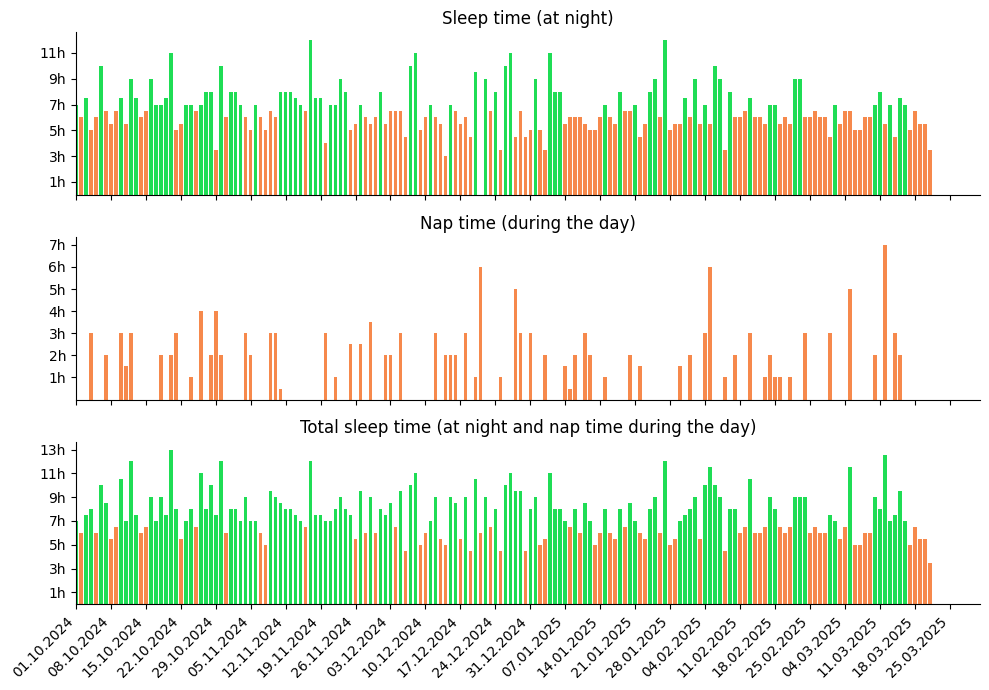

In [120]:
create_graph(
    data,
    passfail,
    const.COLS_SLEEPING,
    ['Sleep time (at night)', 'Nap time (during the day)', 'Total sleep time (at night and nap time during the day)'],
    time_format=True)

### Read

Reading time


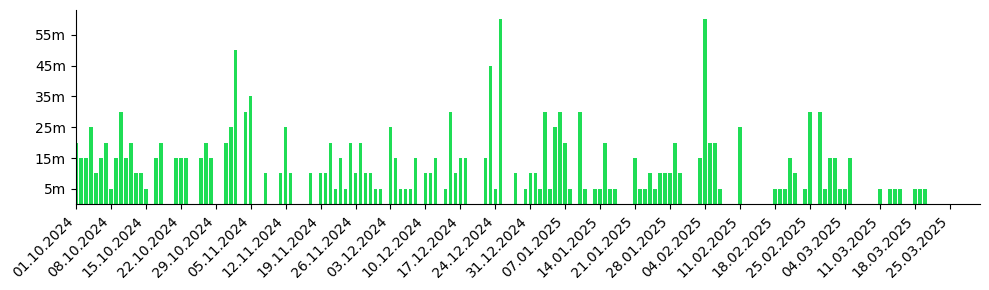

In [121]:
create_graph(data, passfail, const.COLS_READING[-1:], ['Reading time'], time_format=True)

### Work

Working on side projects


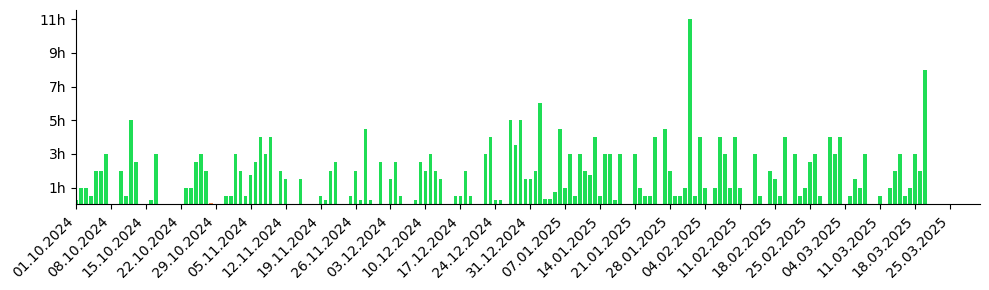

In [122]:
create_graph(data, passfail, const.COLS_WORKING[-1:], ['Working on side projects'], time_format=True)

### Leisure

Phone usage


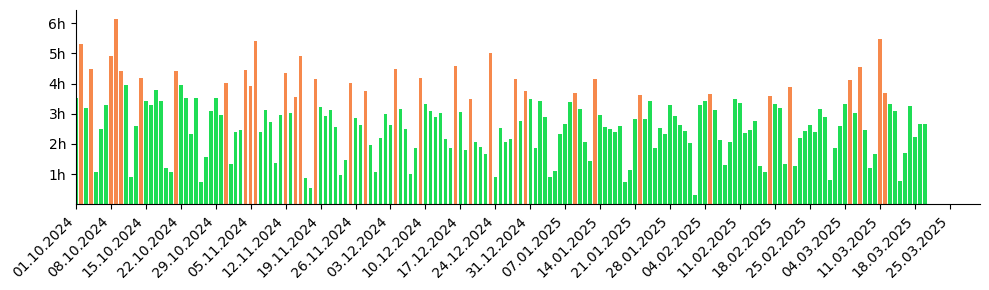

Watching TV


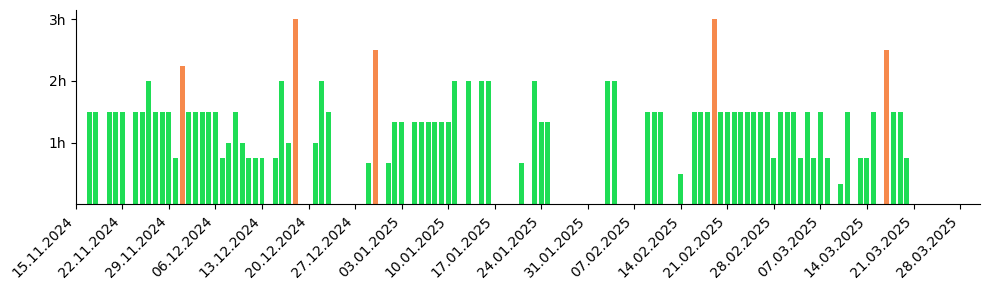

In [123]:
phone, tv = const.COLS_LEISURE
create_graph(data, passfail, [phone], ['Phone usage'], time_format=True)
create_graph(data[45:], passfail[45:], [tv], ['Watching TV'], time_format=True)

### Exercise

Exercise time


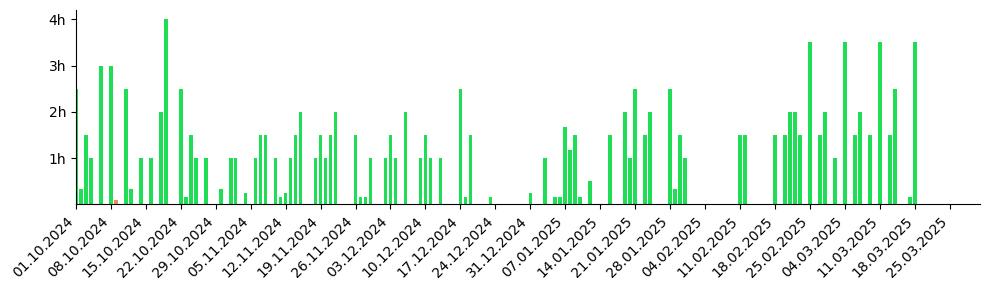

Shoulder raises volume (kg x reps x sets)


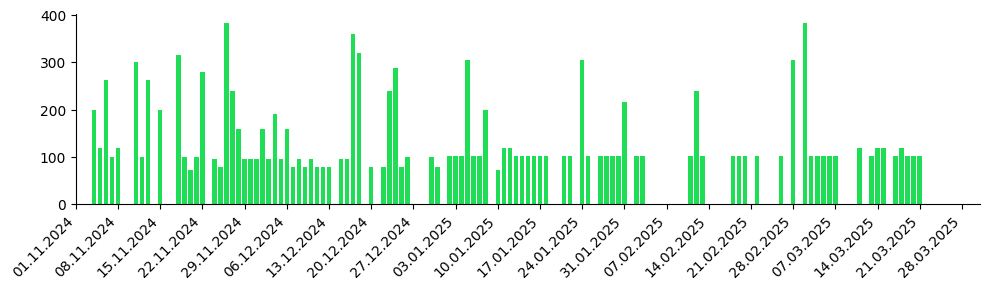

In [124]:
create_graph(data, passfail, [const.COLS_EXERCISE[-1]], ['Exercise time'], time_format=True)
create_graph(data[31:], passfail[31:], [const.COLS_SHOULDER_RAISES[-1]], ['Shoulder raises volume (kg x reps x sets)'], time_format=False)


### Calories

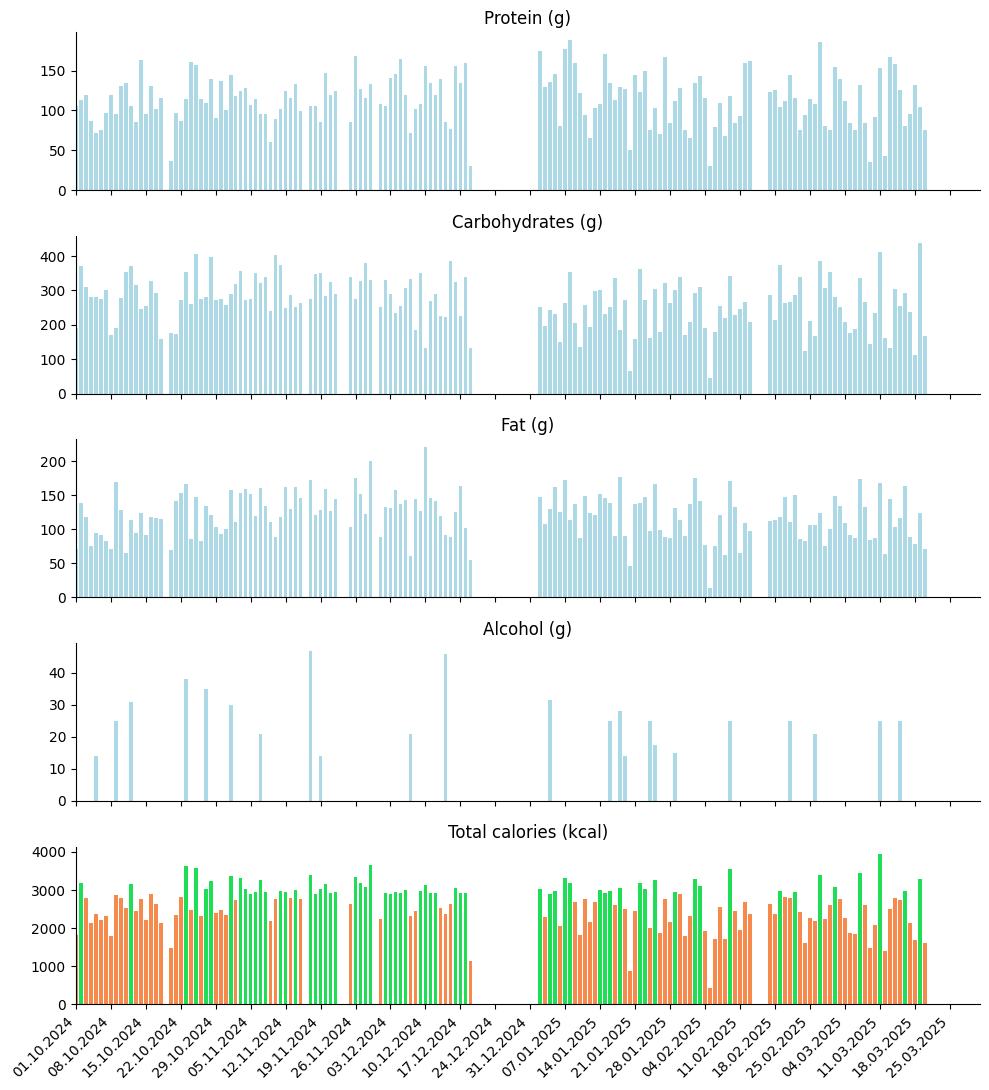

In [125]:
create_graph(
    data,
    passfail,
    const.COLS_EATING,
    ['Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Alcohol (g)', 'Total calories (kcal)'],
    time_format=False)